In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score,r2_score
import matplotlib.pyplot as plt
from sklearn import tree

# Decision Tree

## Cancer Dataset

In [5]:
cancer = pd.read_csv("./Cases/Wisconsin/BreastCancer.csv", index_col=0)
cancer.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [6]:
X = cancer.drop('Class', axis=1)
y = cancer['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=24, stratify=y)

In [7]:
depth = [2,3,4,5]
score = []
for i in depth:
    dtc = DecisionTreeClassifier(random_state=24, max_depth=i, criterion='gini')
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

i_max = np.argmax(score)
print("Best depth: ", depth[i_max])
print("BEst score : ", score[i_max])

Best depth:  2
BEst score :  0.9571428571428572


In [8]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=24)

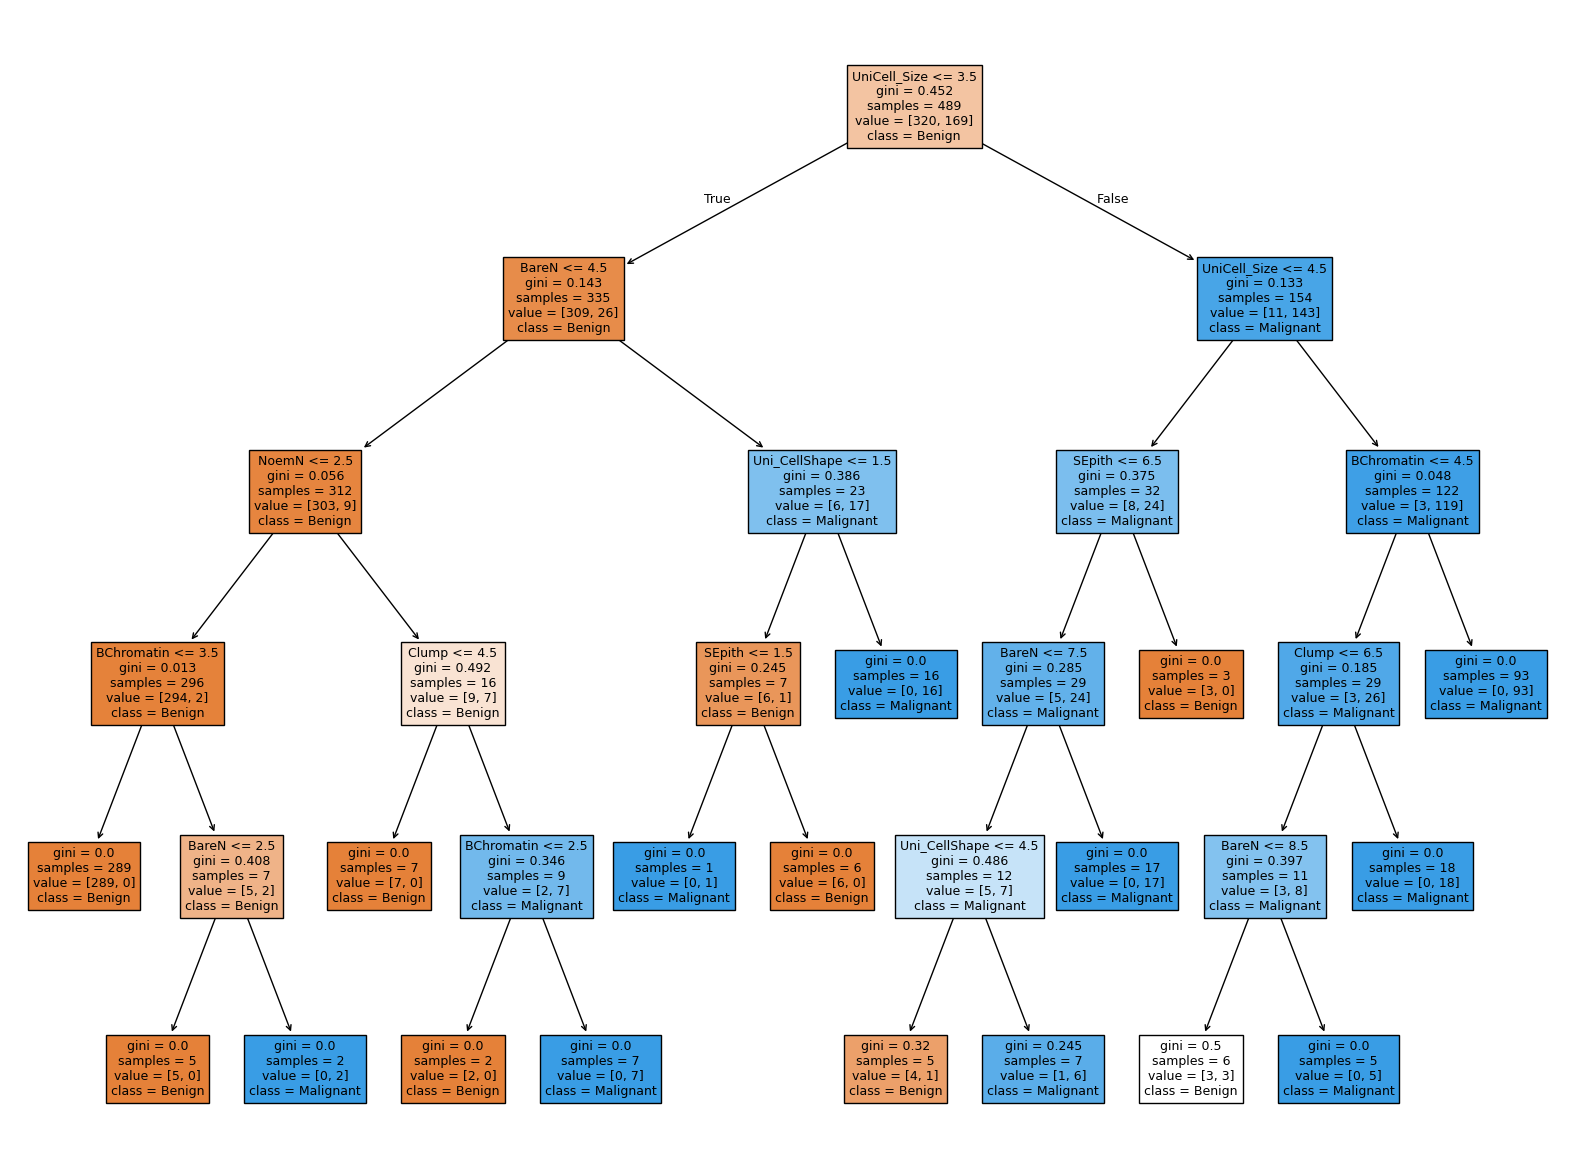

In [20]:
plt.figure(figsize=(20,15))
tree.plot_tree(dtc, filled=True, feature_names=list(X.columns), class_names=list(y.unique()))
plt.show()


# Running with F1 score


In [15]:
depth = [2,3,4,5]
score = []
for i in depth:
    dtc = DecisionTreeClassifier(random_state=24, max_depth=i)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    score.append(f1_score(y_test, y_pred, pos_label='Malignant'))

i_max = np.argmax(score)
print("Best depth: ", depth[i_max])
print("BEst score : ", score[i_max])

Best depth:  2
BEst score :  0.9403973509933775


In [23]:
depth = [2,3,4,None]
min_sample_split = [2,5,10,50]
min_sample_leaf = [1,5,20]
score = []
for i in depth:
    for j in min_sample_split:
        for k in min_sample_leaf:
            dtc = DecisionTreeClassifier(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            score.append([i,j,k,f1_score(y_test, y_pred, pos_label='Malignant')])

# i_max = np.argmax(score)
# print("Best depth: ", depth[i_max])
# print("BEst score : ", score[i_max])
scores_df = pd.DataFrame(data=score, columns=['depth','min_split','min_leaf','f1_score'])
scores_df = scores_df.sort_values(by='f1_score', ascending=False)
scores_df.head()

,depth,min_split,min_leaf,f1_score
0,2.0,2,1,0.940397
33,4.0,50,1,0.940397
22,3.0,50,5,0.940397
23,3.0,50,20,0.940397
1,2.0,2,5,0.940397


## HR Analytics dataset

In [24]:
hr_df = pd.read_csv("./Cases/human-resources-analytics/HR_comma_sep.csv")
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [25]:
X = hr_df.drop('left', axis=1)
X_ohe = pd.get_dummies(X, drop_first=True)
y = hr_df['left']
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.3, random_state=24, stratify=y)


In [28]:
depth = [2,3,5,None]
min_sample_split = [2,10,100,1000]
min_sample_leaf = [1,50,100,200]
score = []
for i in depth:
    for j in min_sample_split:
        for k in min_sample_leaf:
            dtc = DecisionTreeClassifier(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            score.append([i,j,k,f1_score(y_test, y_pred,pos_label=1) ])

# i_max = np.argmax(score)
# print("Best depth: ", depth[i_max])
# print("BEst score : ", score[i_max])
scores_df = pd.DataFrame(data=score, columns=['depth','min_split','min_leaf','f1_score'])
scores_df = scores_df.sort_values(by='f1_score', ascending=False)
scores_df.head()

,depth,min_split,min_leaf,f1_score
56,NaN,100,1,0.952890
48,NaN,2,1,0.950532
52,NaN,10,1,0.948754
40,5.0,100,1,0.944444
32,5.0,2,1,0.943649


### Inferencing

In [33]:
tst = pd.read_csv("./Cases/human-resources-analytics/tst_hr.csv")
tst.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.11,0.88,7,272,4,0,0,sales,medium
1,0.72,0.87,5,223,5,0,0,sales,low
2,0.37,0.52,2,159,3,0,0,sales,low
3,0.41,0.50,2,153,3,0,0,sales,low
4,0.67,0.61,3,202,2,0,0,technical,medium


In [36]:
tst = pd.get_dummies(tst, drop_first=True)
tst

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_support,Department_technical,salary_low,salary_medium
0,0.11,0.88,7,272,4,0,0,False,False,False,True
1,0.72,0.87,5,223,5,0,0,False,False,True,False
2,0.37,0.52,2,159,3,0,0,False,False,True,False
3,0.41,0.50,2,153,3,0,0,False,False,True,False
4,0.67,0.61,3,202,2,0,0,False,True,False,True
5,0.76,0.62,3,150,2,1,0,False,True,False,False
6,0.19,0.78,5,156,6,0,0,False,True,False,True
7,0.52,0.73,2,233,3,0,0,False,True,False,True
8,0.66,0.59,5,262,2,0,0,False,True,False,True
9,0.95,0.67,3,183,3,0,0,True,False,False,True


In [39]:
X_ohe.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [40]:
tst.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_support', 'Department_technical',
       'salary_low', 'salary_medium'],
      dtype='object')

In [ ]:
# dtc = DecisionTreeClassifier(random_state=24, max_depth=None, min_samples_split=100, min_samples_leaf=1)
# dtc.fit(X_ohe, y)
# y_pred = dtc.predict(tst)
# print(f1_score(y_test, y_pred))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Department_RandD
- Department_accounting
- Department_hr
- Department_management
- Department_marketing
- ...


# Inferencing with OHE

### In order to remove the above error we need to One Hot Encode instead of pd.get_dummies 

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer


In [43]:
hr_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [52]:
X = hr_df.drop('left', axis=1)
y = hr_df['left']
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)),("passthrough", make_column_selector(dtype_exclude=object)),verbose_feature_names_out=False).set_output(transform='pandas')

In [53]:
X_ohe = ct.fit_transform(X)
X_ohe.head()

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.38,0.53,2,157,3,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.80,0.86,5,262,6,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.10,0.77,6,247,4,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.92,0.85,5,259,5,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.89,1.00,5,224,5,0,0


In [54]:

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.3, random_state=24, stratify=y)

depth = [2,3,5,None]
min_sample_split = [2,10,100,1000]
min_sample_leaf = [1,50,100,200]
score = []
for i in depth:
    for j in min_sample_split:
        for k in min_sample_leaf:
            dtc = DecisionTreeClassifier(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            score.append([i,j,k,f1_score(y_test, y_pred,pos_label=1) ])

# i_max = np.argmax(score)
# print("Best depth: ", depth[i_max])
# print("BEst score : ", score[i_max])
scores_df = pd.DataFrame(data=score, columns=['depth','min_split','min_leaf','f1_score'])
scores_df = scores_df.sort_values(by='f1_score', ascending=False)
scores_df.head()

,depth,min_split,min_leaf,f1_score
56,NaN,100,1,0.952890
52,NaN,10,1,0.948308
48,NaN,2,1,0.947950
40,5.0,100,1,0.944444
32,5.0,2,1,0.943649


In [45]:
tst = pd.read_csv("./Cases/human-resources-analytics/tst_hr.csv")
tst.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.11,0.88,7,272,4,0,0,sales,medium
1,0.72,0.87,5,223,5,0,0,sales,low
2,0.37,0.52,2,159,3,0,0,sales,low
3,0.41,0.50,2,153,3,0,0,sales,low
4,0.67,0.61,3,202,2,0,0,technical,medium


In [55]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
# ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)),("passthrough", make_column_selector(dtype_exclude=object)),verbose_feature_names_out=False).set_output(transform='pandas')
tst_ohe = ct.transform(tst)

In [57]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=None, min_samples_split=100, min_samples_leaf=1)
dtc.fit(X_ohe, y)
y_pred = dtc.predict(tst_ohe)


In [58]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Using Pipeline

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)),("passthrough", make_column_selector(dtype_exclude=object)),verbose_feature_names_out=False).set_output(transform='pandas')
bm = DecisionTreeClassifier(random_state=24, max_depth=None, min_samples_split=100, min_samples_leaf=1)
pipe = Pipeline([('CT',ct),('TREE',bm)])
pipe.fit(X_ohe, y)
pipe.predict(tst_ohe)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
y_test

6859     0
10379    0
6298     0
13552    0
6450     0
        ..
6600     0
13560    0
9767     0
9514     0
8308     0
Name: left, Length: 4499, dtype: int64

## Glass dataset

In [62]:
glass = pd.read_csv("./Cases/Glass Identification/Glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [63]:
X = glass.drop('Type', axis=1)
y = glass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [67]:
y.head()

0    building_windows_float_processed
1    building_windows_float_processed
2    building_windows_float_processed
3    building_windows_float_processed
4    building_windows_float_processed
Name: Type, dtype: object

In [75]:
depth = [2,3,4,None]
min_sample_split = [2,10,100]
min_sample_leaf = [1,25,50]
score = []
for i in depth:
    for j in min_sample_split:
        for k in min_sample_leaf:
            dtc = DecisionTreeClassifier(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            score.append([i,j,k,f1_score(y_test, y_pred, average='micro') ])

# i_max = np.argmax(score)
# print("Best depth: ", depth[i_max])
# print("BEst score : ", score[i_max])
scores_df = pd.DataFrame(data=score, columns=['depth','min_split','min_leaf','f1_score'])
scores_df = scores_df.sort_values(by='f1_score', ascending=False)
scores_df.head()

,depth,min_split,min_leaf,f1_score
30,NaN,10,1,0.692308
9,3.0,2,1,0.676923
27,NaN,2,1,0.676923
12,3.0,10,1,0.676923
0,2.0,2,1,0.600000


In [76]:
tst = pd.read_csv("./Cases/Glass Identification/tst_Glass.csv")
tst.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.5321,14.0,0.00,0.34,70.23,0.001,6.7,1.23,0.000
1,1.5212,15.0,3.00,1.23,75.90,0.100,7.0,0.00,0.440
2,1.5112,13.0,3.50,2.30,73.00,3.400,14.0,2.30,0.220
3,1.5000,12.4,1.23,3.22,74.22,4.500,10.0,3.10,0.100
4,1.5200,13.0,2.40,0.34,71.22,3.200,9.0,1.44,0.001


In [77]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=None, min_samples_split=10, min_samples_leaf=1)
dtc.fit(X, y)
y_pred = dtc.predict(tst)
y_pred

array(['headlamps', 'building_windows_float_processed',
       'building_windows_float_processed', 'headlamps', 'headlamps',
       'building_windows_non_float_processed'], dtype=object)

# Regression Tree

## Boston Dataset

In [78]:
boston = pd.read_csv("./Datasets/Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [79]:
X = boston.drop('medv', axis=1)
y = boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [85]:
max_depth = [2,4,6,None]
min_sample_split = [2,5,10,20]
min_sample_leaf = [1,5,10,20]
score = []
for i in depth:
    for j in min_sample_split:
        for k in min_sample_leaf:
            dtc = DecisionTreeRegressor(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            score.append([i,j,k,r2_score(y_test, y_pred) ])

# i_max = np.argmax(score)
# print("Best depth: ", depth[i_max])
# print("BEst score : ", score[i_max])
scores_df = pd.DataFrame(data=score, columns=['depth','min_split','min_leaf','r2_score'])
scores_df = scores_df.sort_values(by='r2_score', ascending=False)
scores_df.head()

,depth,min_split,min_leaf,r2_score
60,NaN,20,1,0.725231
52,NaN,5,1,0.714670
56,NaN,10,1,0.712486
44,4.0,20,1,0.693367
40,4.0,10,1,0.693367


In [86]:
bm = DecisionTreeRegressor(random_state=24, max_depth=None, min_samples_split=20, min_samples_leaf=1)
bm.fit(X,y)

DecisionTreeRegressor(min_samples_split=20, random_state=24)

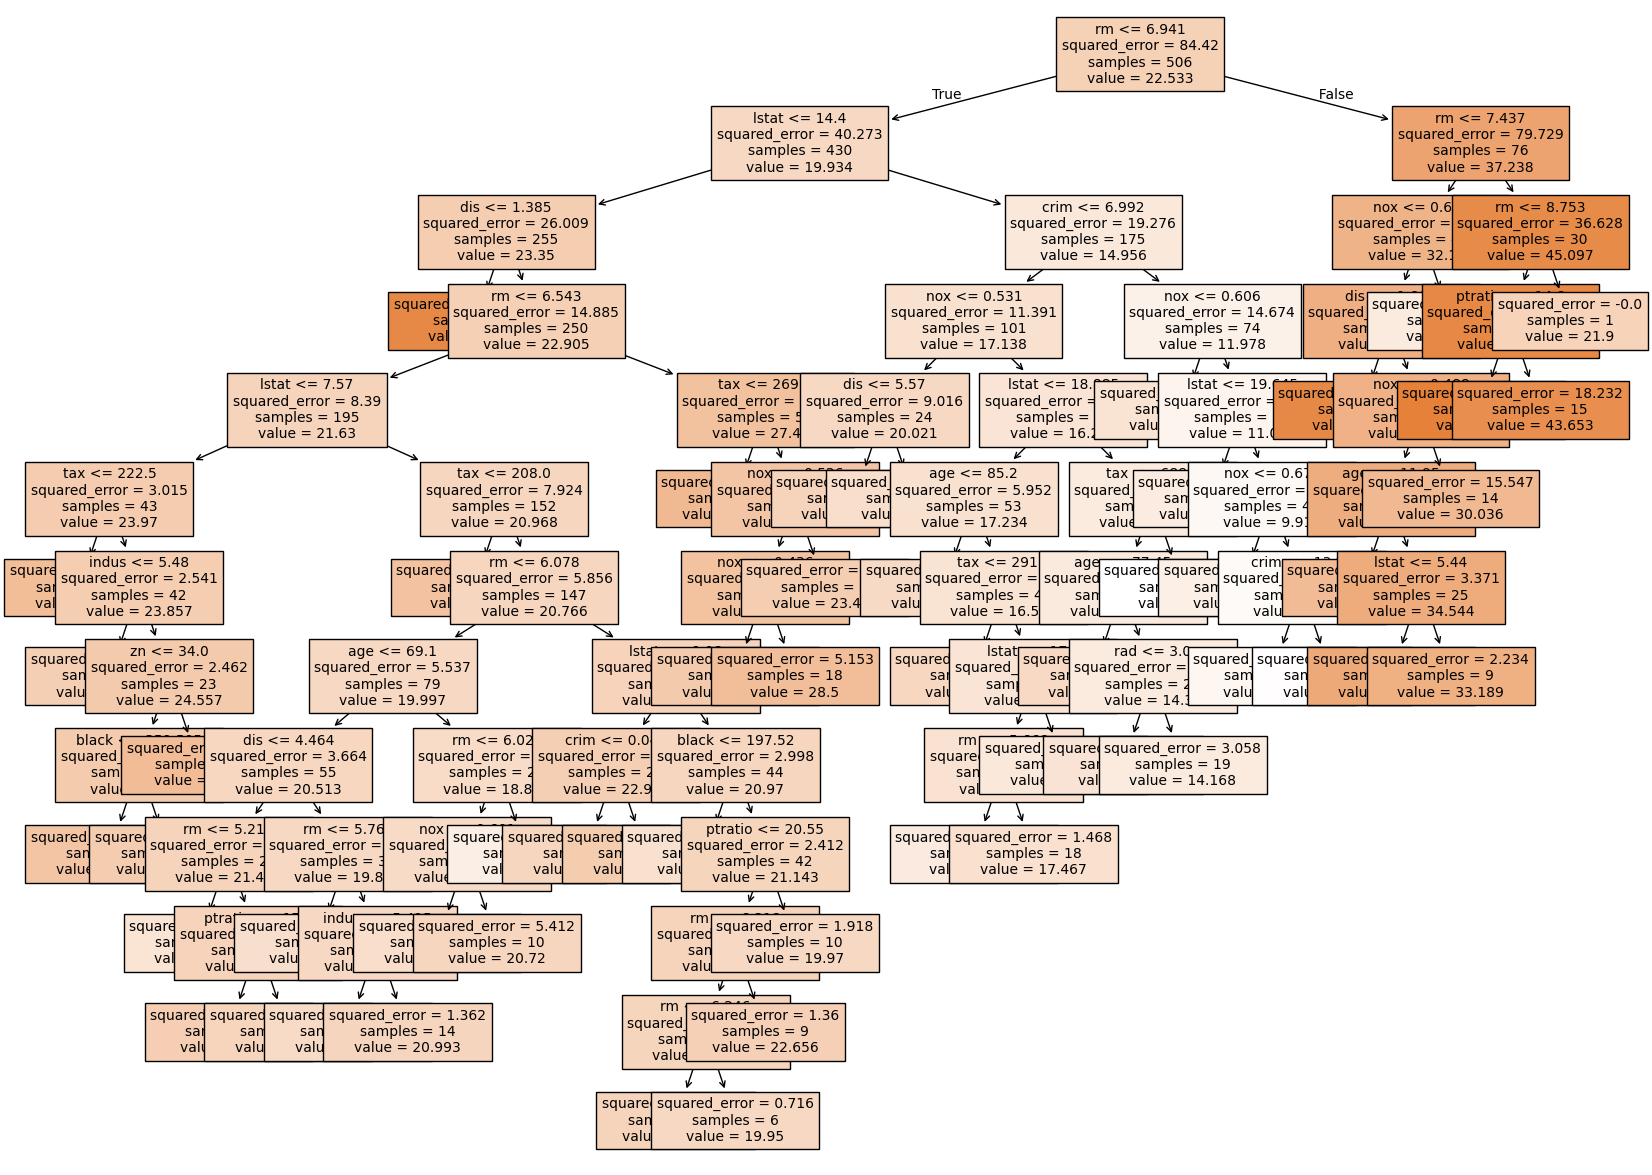

In [90]:
plt.figure(figsize=(20,15))
plot_tree(bm, feature_names=list(X.columns) ,filled=True, fontsize=10)
plt.show()

In [94]:
df_imp = pd.DataFrame({'Importance':bm.feature_importances_, 'Column': list(X.columns)})
df_imp.sort_values('Importance', ascending=False, inplace=True)

In [95]:
df_imp

,Importance,Column
5,0.615563,rm
12,0.202259,lstat
7,0.073156,dis
4,0.051361,nox
0,0.031029,crim
9,0.013995,tax
6,0.004971,age
10,0.004730,ptratio
2,0.001147,indus
11,0.001004,black


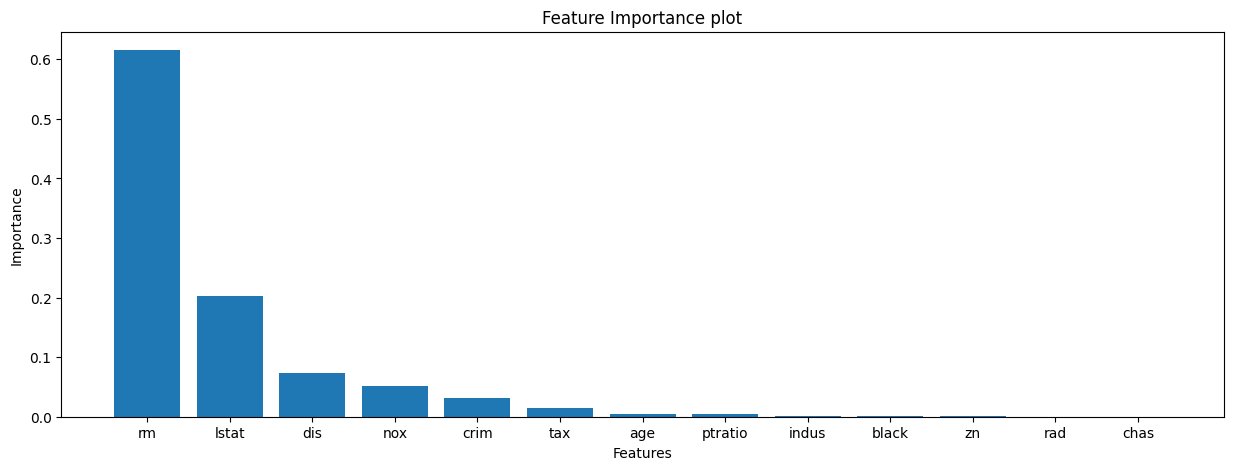

In [100]:
plt.figure(figsize=(15,5))
plt.bar(df_imp['Column'], df_imp['Importance'])
plt.title("Feature Importance plot")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

## Concrete Strength Dataset

In [107]:
concrete = pd.read_csv("./Cases/Concrete Strength/Concrete_Data.csv")
concrete.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [108]:
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [109]:
max_depth = [2,4,6,None]
min_sample_split = [2,5,10,20]
min_sample_leaf = [1,5,10,20]
score = []
for i in depth:
    for j in min_sample_split:
        for k in min_sample_leaf:
            dtc = DecisionTreeRegressor(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            score.append([i,j,k,r2_score(y_test, y_pred) ])

# i_max = np.argmax(score)
# print("Best depth: ", depth[i_max])
# print("BEst score : ", score[i_max])
scores_df = pd.DataFrame(data=score, columns=['depth','min_split','min_leaf','r2_score'])
scores_df = scores_df.sort_values(by='r2_score', ascending=False)
scores_df.head()

,depth,min_split,min_leaf,r2_score
52,NaN,5,1,0.848471
48,NaN,2,1,0.830895
56,NaN,10,1,0.830692
57,NaN,10,5,0.814391
49,NaN,2,5,0.814391


In [110]:
bm = DecisionTreeRegressor(random_state=24, max_depth=None, min_samples_split=5, min_samples_leaf=1)
bm.fit(X,y)

DecisionTreeRegressor(min_samples_split=5, random_state=24)

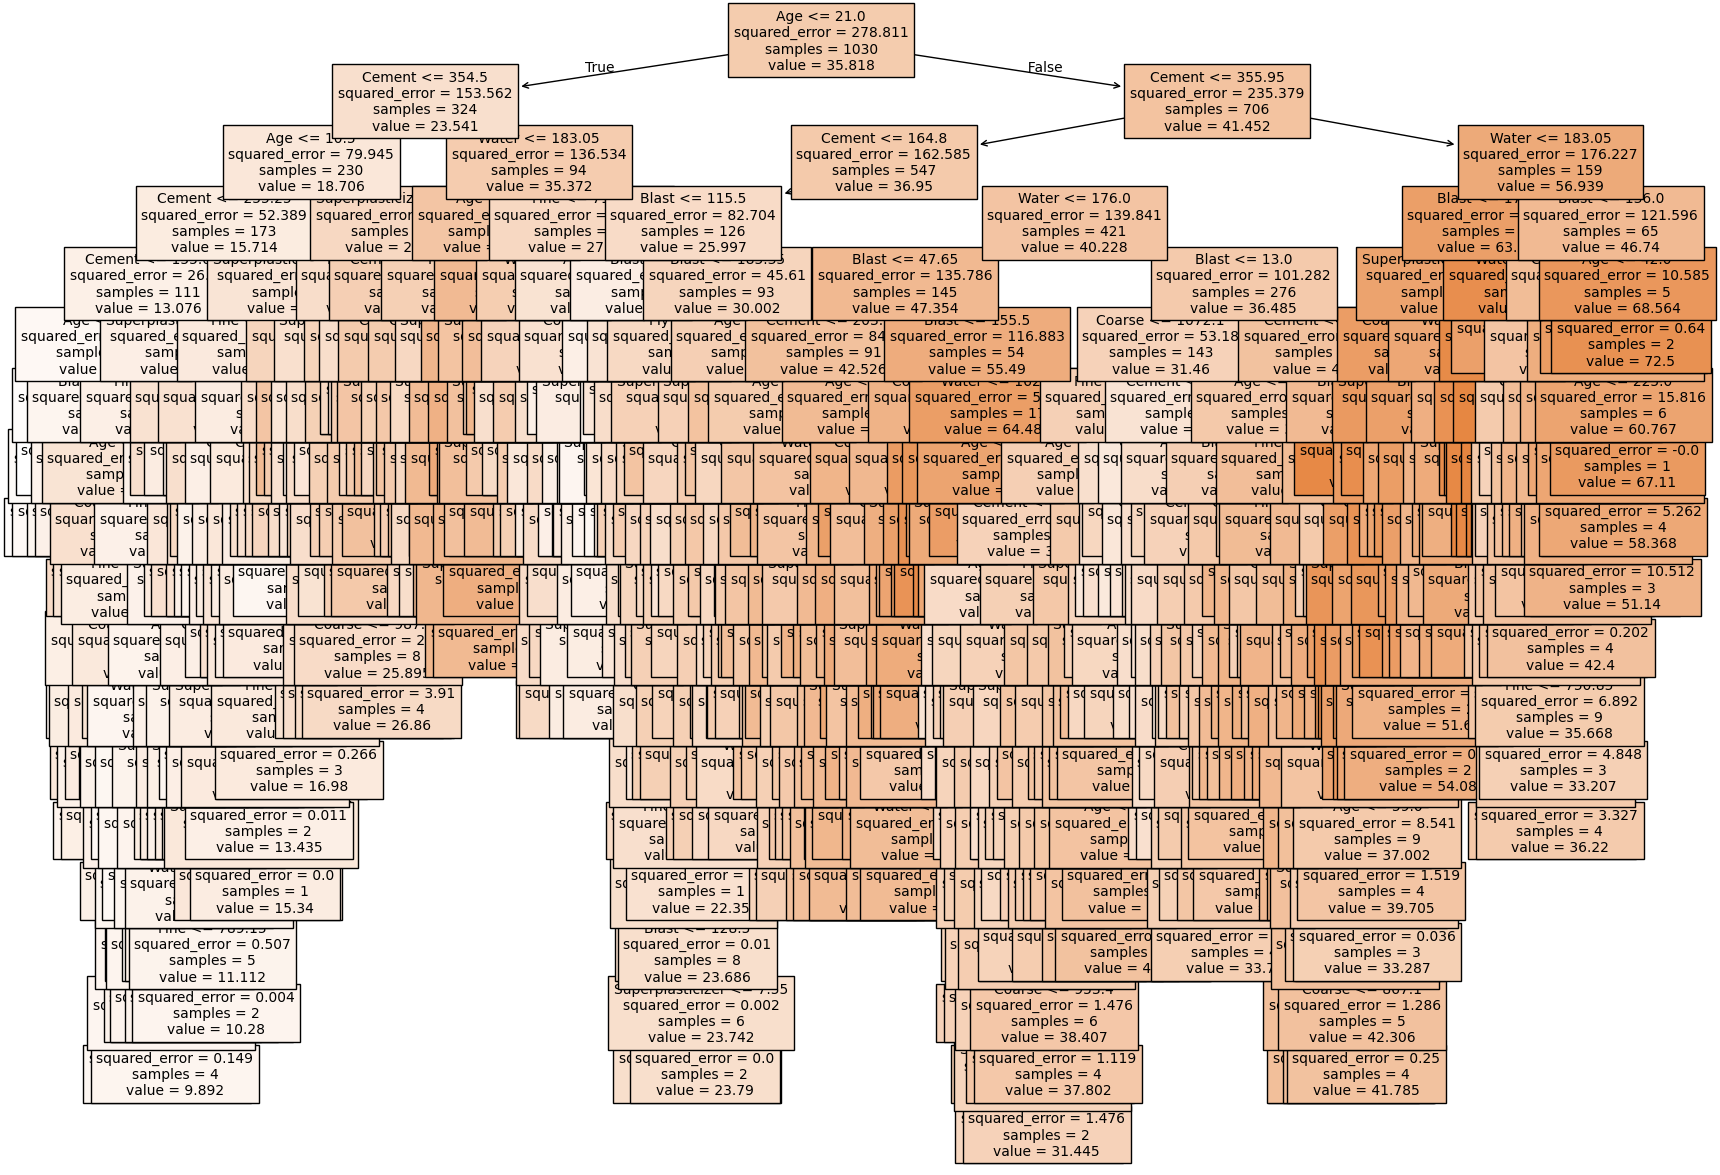

In [111]:
plt.figure(figsize=(20,15))
plot_tree(bm, feature_names=list(X.columns) ,filled=True, fontsize=10)
plt.show()

In [112]:
cement_df = pd.DataFrame({'Importance':bm.feature_importances_, 'Column': list(X.columns)})
cement_df.sort_values('Importance', ascending=False, inplace=True)

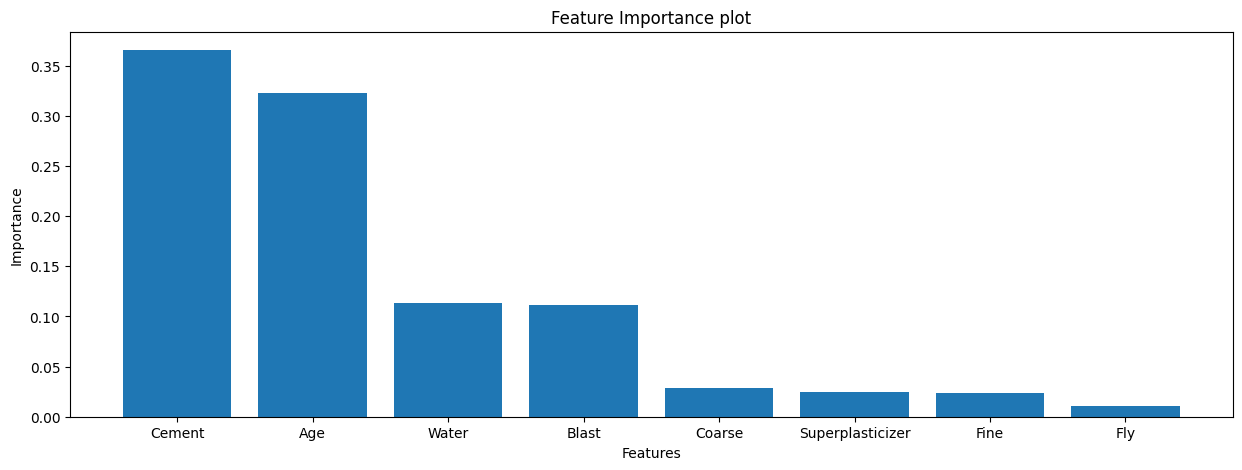

In [115]:
plt.figure(figsize=(15,5))
plt.bar(cement_df['Column'], cement_df['Importance'])
plt.title("Feature Importance plot")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()